<br><br><center><h1 style="font-size:2em;color:#193300">Casos Falsos Perfiles en Instagram</h1></center>
<p>
<br><br><center><h1 style="font-size:2em;color:#193300">Programa de Ciencia de Datos</h1></center>
<p>
<p><center><h1 style="font-size:1.7em;color:#193300">Departamento de Matemáticas </h1></center>
<p>
<p><p><center><h1 style="font-size:1.4em;color:#193300">  Universidad Externado de Colombia</h1></center>
<p>




<p><p><center><a href='https://www.uexternado.edu.co/programa/departamento-de-matematicas/ciencia-de-datos/'> <img src='Uexternado.png'  width="220"/></a></center>
<p>





<p><p><center><h1 style="font-size:2em;color:#193300"> Usando el proceso de análisis </h1></center>
    

    
    
    
<a> <img src='proceso.png'  width="1000"/></a>



<p><p><center><h1 style="font-size:2em;color:#193300"> Proceso </h1></center>

<p><p><left><h1 style="font-size: 1em;color:#193300"> Usaremos la base de datos del censo para crear una pantalla de datos que resuma el contenido de la base y nos permita tener una mejor visualización. </h1></left>
    
 
<p><p><left><h1 style="font-size: 1em;color:#193300"> Las etapas son:  </h1></left>   
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Conocer el contexto de los datos y la problemática a resolver.  </h1></left>
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Recolectar y procesar los datos </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Hacer un análisis exploratorio de los datos.  </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Establecer el mejor modelo para resolver el problema.  </h1></left>      
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Ajustar el modelo. </h1></left>    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Validar los resultados.  </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Intepretar y analizar los resultados.  </h1></left>   

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

file_name = "https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/atest.csv"
atest = pd.read_csv(file_name)
file_name = "https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/atrain.csv"
atrain = pd.read_csv(file_name)


<p><p><left><h1 style="font-size: 1em;color:#193300">Acá se puede observar la base de datos original. Observe atentamente los nombres y valores. </h1></left>
    
    

<p><p><left><h1 style="font-size: 1em;color:#193300">Seguramente podrá ver que es muy difícil hacerse una idea de la utilidad que tiene esta base de datos. </h1></left>  
    
    
    

<p><p><left><h1 style="font-size: 1em;color:#193300">Lo primero que vamos a hacer es generar un reporte de gráficos que me permita conocer un poco más acerca de las variables y sus relaciones. </h1></left>      

In [81]:
atest

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


<p><p><center><h1 style="font-size:2em;color:#193300"> Problematica</h1></center>

<p><p><left><h1 style="font-size: 1em;color:#193300"> Esta base de datos contiene la información histórica de las cuentas de Instagram </h1></left>
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Uno de los problemas usuales es la cantidad de cuentas falsas que aparecen constantemente. </h1></left>
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Con la siguiente información, se intentará predecir si una cuenta es falsa o no. </h1></left>
            
    

 						
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Alguna variables son:  </h1></left>   
	  
* <p><p><left><h1 style="font-size: 1em;color:#193300"> profile pic: Si tiene foto de perfil 1 para si 0 para no.  </h1></left>
* <p><p><left><h1 style="font-size: 1em;color:#193300"> nums/length username: Proporción de letras usadas para el usuario. Está entre 0 y 1 </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> fullname words: # palabras para el nombre.  </h1></left>      
* <p><p><left><h1 style="font-size: 1em;color:#193300"> nums/length fullname:Proporción de letras usadas para el nombre. Está entre 0 y 1  </h1></left>    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> 	name==username: Si el nombre es igual al usuario.  </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> description length: Descripción cuenta.  </h1></left>  
* <p><p><left><h1 style="font-size: 1em;color:#193300"> external URL: Tiene dirección web Si 1, no 0.  </h1></left>
* <p><p><left><h1 style="font-size: 1em;color:#193300"> private: Es privado si 1 no 0.  </h1></left>  
* <p><p><left><h1 style="font-size: 1em;color:#193300"> #posts: # de post.  </h1></left>
* <p><p><left><h1 style="font-size: 1em;color:#193300"> #followers: # de seguidores.  </h1></left>   
* <p><p><left><h1 style="font-size: 1em;color:#193300"> #follows: # de personas a quien sigue.  </h1></left>     
* <p><p><left><h1 style="font-size: 1em;color:#193300"> fake: Si la cuenta es falsa Si 1, No 0.  </h1></left>       

<p><p><center><h1 style="font-size:2em;color:#193300"> Exploración de Datos </h1></center>
    
<p><p><left><h1 style="font-size: 1em;color:#193300">Lo primero que se debe hacer, es observar como se relacionan las variables y como se pueden organizar.  </h1></left>  
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> A continuación usted vera dos formas de crear reportes. La primera la puede observar haciendo click aqui  </h1></left>      
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> La segunda se puede observar sobre este documento. El objetivo de estos reportes es observar que hay en la base de datos de forma resumida e interactiva.  </h1></left>      
    
    
    

In [82]:
import pandas as pd
df_one = pd.get_dummies(atrain["fake"], drop_first=True)
df_two = pd.concat((df_one, atrain), axis=1)
df_two = df_two.drop(["fake"], axis=1)
df_sw = df_two.rename(columns={1: "fake"})
#!pip install sweetviz
import sweetviz
my_report = sweetviz.analyze([df_sw, "atrain"],target_feat='fake')
my_report.show_html('ReportSweetviz.html')

                                             |          | [  0%]   00:00 -> (? left)

Report ReportSweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [83]:
from dataprep.eda import create_report
create_report(atrain)

ImportError: Dask dataframe requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[dataframe]" --upgrade  # or python -m pip install

<p><p><center><h1 style="font-size:2em;color:#193300"> Datos </h1></center>
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> El siguiente gráficose organiza de la siguiente forma:  </h1></left>  
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> El cuadro rojo son las cuentas faltas y que están etiquetadas con 1. El cuadro azul son las cuentas no falsas etiquetadas con 0.  </h1></left> 
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Dentro del cuado azul, se puede observar que todas las cuentas tienen foto de perfil y por eso solo se puede ver la selección de 1.</h1></left>   
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Dentro del cuado rojo, se puede observar que no todas las cuentas tienen foto de perfil y por eso se ver la siguiente clasificación con 0 (Sin foto de perfil) y 1 (foto de perfil).</h1></left>     

* <p><p><left><h1 style="font-size: 1em;color:#193300"> Dentro del cuado azul, se puede observar que todas las cuentas tienen foto de perfil y por eso solo se puede ver la selección de 1. </h1></left>   
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Para ver el impacto de estas cuentas falsas y si las personas las pueden diferenciar de forma fácil, el siguiente número que aparece es el número de seguidores que tiene cada una de las cuentas.  </h1></left>  
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Como conclusión se puede ver que en general las personas no reconocen una cuenta falsa, ya que hay muchos usuarios que siguen este tipo de cuentas.  </h1></left>      

In [93]:
# una forma de presentar datos categóricos
grafico = px.treemap(df_sw, path=['fake','profile pic' ,'#followers'])
grafico.show()

<p><p><center><h1 style="font-size:2em;color:#193300"> Creación del modelo </h1></center>
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Lo primero que se debe tener en cuenta es que este es un modelo de clasificación  </h1></left>  
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> El objetivo es crear un modelo para predecir más adelante si una cuenta puede ser o no falsa.  </h1></left> 
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> En este ejemplo usaremos uno conocido como random forest.</h1></left>   
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> La ventaja es que es un modelo robusto ya que usa diferentes "mini modelos" para encontrar el resultado .</h1></left>     

* <p><p><left><h1 style="font-size: 1em;color:#193300"> En el siguiente ejemplo se podrá observar como se clasifica una cuenta falsa de acuerdo a las variables. </h1></left>  

[Text(581.25, 660.625, '#follows <= 94.0\ngini = 0.5\nsamples = 355\nvalue = [279, 297]\nclass = a'),
 Text(290.625, 471.875, '#followers <= 95.0\ngini = 0.21\nsamples = 125\nvalue = [25, 185]\nclass = a'),
 Text(145.3125, 283.125, '#followers <= 68.5\ngini = 0.098\nsamples = 114\nvalue = [10, 184]\nclass = a'),
 Text(72.65625, 94.375, 'gini = 0.083\nsamples = 107\nvalue = [8, 176]\nclass = a'),
 Text(217.96875, 94.375, 'gini = 0.32\nsamples = 7\nvalue = [2, 8]\nclass = a'),
 Text(435.9375, 283.125, 'private <= 0.5\ngini = 0.117\nsamples = 11\nvalue = [15, 1]\nclass = f'),
 Text(363.28125, 94.375, 'gini = 0.0\nsamples = 9\nvalue = [14, 0]\nclass = f'),
 Text(508.59375, 94.375, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = f'),
 Text(871.875, 471.875, 'profile pic <= 0.5\ngini = 0.425\nsamples = 230\nvalue = [254, 112]\nclass = f'),
 Text(726.5625, 283.125, 'nums/length username <= 0.04\ngini = 0.115\nsamples = 32\nvalue = [3, 46]\nclass = a'),
 Text(653.90625, 94.375, 'gini = 0.32\

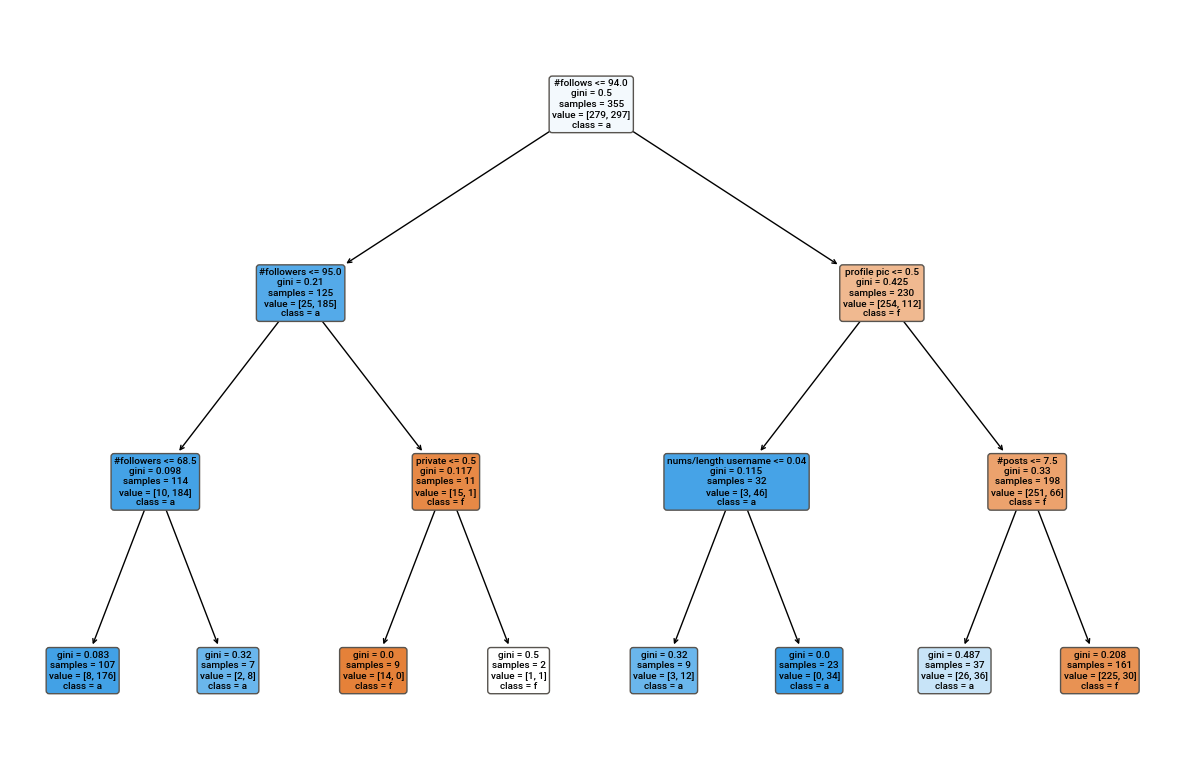

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  plot_tree
model = RandomForestClassifier(n_estimators=10, max_depth=3)

### split the data in train and test 67% and 33%
y=atrain["fake"]
## drop the quality column
x=atrain.drop(columns="fake")
# Train
model.fit(x, y)
# Extract single tree
estimator = model.estimators_[5]

fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows'],
          class_names="fake", 
          filled=True, impurity=True, 
          rounded=True)

<p><p><center><h1 style="font-size:2em;color:#193300"> Análisis del modelo </h1></center>
    
Este se análisis se realizará considerando el camino de si la cuenta es falsa.    
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Como se puede observar en la caja superior, el modelo inicia diciendo que sin una cuenta sigue menos de 94 cuentas se puede considerar falsa. </h1></left>  
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> En el segundo nivel se observa en la caja azul que si la cuenta tiene menos de 95 seguidores, puede considerarse falsa.  </h1></left> 
    
* <p><p><left><h1 style="font-size: 1em;color:#193300"> Finalmente, si después de descartar esas cuentas, se revisa y se observa que aun quedan algunas con menos de 68 seguidores estas se consideran falsas.</h1></left>   
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Intenta hacer el mismo ejercicio combinando los demás resultados del árbol.</h1></left>     
    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Si no sabes cómo, puedes preguntarle a algún asesor para que te ayude a entender mejor el modelo.</h1></left>         


    
<p><p><left><h1 style="font-size: 1em;color:#193300"> Si fueras el gerente de Instagram, ¿qué decisiones podrías tomar con esta información?.</h1></left>         


    
    

 